In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
athlete_bio=pd.read_csv('files/Olympic_Athlete_Bio.csv')
athletes=pd.read_csv('files/Olympic_Athlete_Event_Results.csv')
country=pd.read_csv('files/Olympics_Games.csv')
olympics_medals=pd.read_csv('files/Olympic_Games_Medal_Tally.csv')


In [39]:
# separating each olympics edition
year='1908'
edition=athletes.loc[athletes['edition']>year]#.set_index('edition')



In [40]:
#separating the winter and summer olympics
Winter=edition.loc[edition['edition'].str.contains('Winter')]
Summer=edition.loc[edition['edition'].str.contains('Summer')]


In [41]:
#create a new column for the years for the winter and summer olympics
Winter['year']=Winter['edition'].str.extract(r'(.*?)(?=\sWinter)', expand=False)
Summer['year']=Summer['edition'].str.extract(r'(.*?)(?=\sSummer)', expand=False)

C:\Users\tristan\AppData\Local\Temp\ipykernel_6508\797483816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Winter['year']=Winter['edition'].str.extract(r'(.*?)(?=\sWinter)', expand=False)
C:\Users\tristan\AppData\Local\Temp\ipykernel_6508\797483816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summer['year']=Summer['edition'].str.extract(r'(.*?)(?=\sSummer)', expand=False)


In [42]:
#counting the number of participants in each olympics
participantswinter=pd.DataFrame(Winter.groupby(['year'])['athlete'].nunique())
participantssummer=pd.DataFrame(Summer.groupby(['year'])['athlete'].nunique())



In [43]:
#renaming the columns athlete to total athletes
participantswinter=participantswinter.rename(columns={'athlete':'total athletes'})
participantssummer=participantssummer.rename(columns={'athlete':'total athletes'})


c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


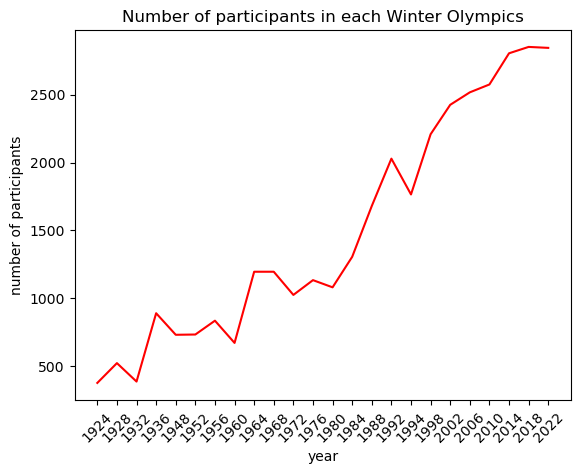

In [44]:
#plotting the number of participants in each olympics for winter 

winterplot=sns.lineplot(data=participantswinter, x='year', y='total athletes', legend='auto',color='red') 
plt.xticks(rotation=45)
plt.ylabel('number of participants')
winterplot.set_title('Number of participants in each Winter Olympics')
plt.show()

c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


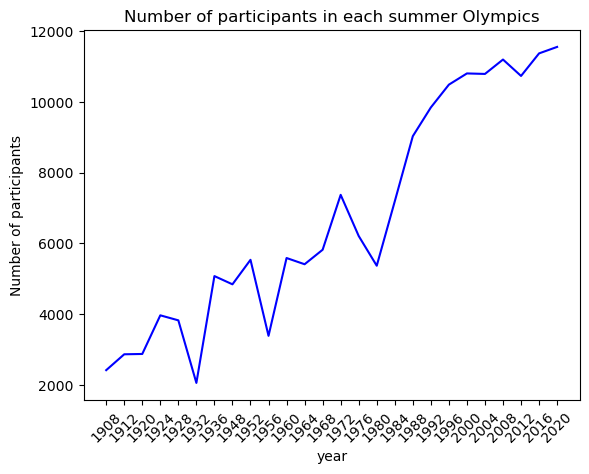

In [45]:
#plotting the number of participants in each olympics for summer 
summerplot=sns.lineplot(data=participantssummer, x='year', y='total athletes',legend='auto', color='blue', )
plt.ylabel('Number of participants') 
summerplot.set_title('Number of participants in each summer Olympics')
plt.xticks(rotation=45)
plt.show()


c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


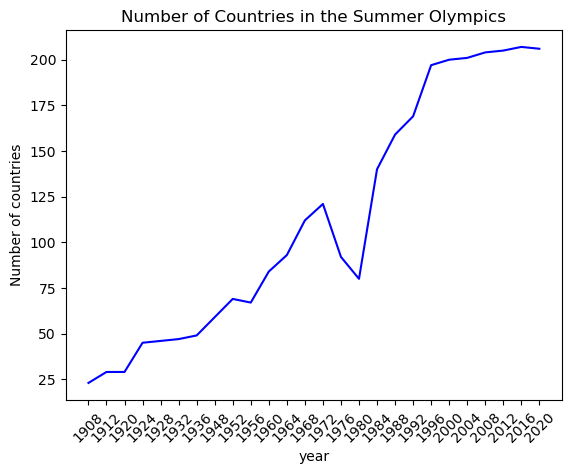

In [46]:
#Let's try to explain the big variation in the number of participants in the summer 
# olympics by looking at the number of countries participating.
countriessummer=pd.DataFrame(Summer.groupby(['year'])['country_noc'].nunique())
countriessummer=countriessummer.rename(columns={'country_noc':'total countries'})
countriessummer=sns.lineplot(data=countriessummer, x='year', y='total countries',legend='auto', color='blue')
countriessummer.set_title('Number of Countries in the Summer Olympics')
plt.ylabel('Number of countries')
plt.xticks(rotation=45)
plt.show()

c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tristan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


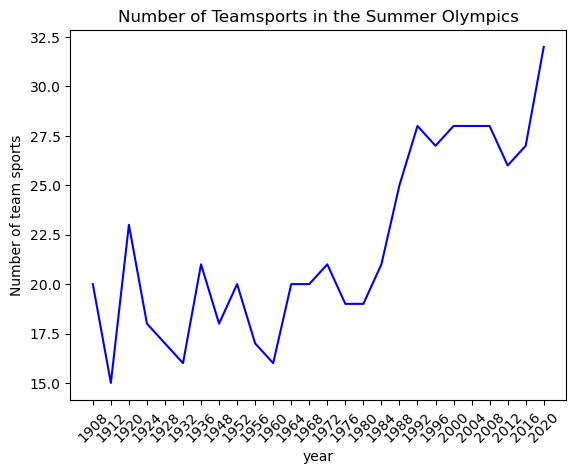

In [47]:
# now let's do the same with the number of team sports, as the two are likely to be related
teamsum=Summer.loc[Summer['isTeamSport']==1]
teamsports=pd.DataFrame(teamsum.groupby(['year'])['sport'].nunique())
teamsplot=teamsports.rename(columns={'sport':'total team sports'})
teamsplot=sns.lineplot(data=teamsplot, x='year', y='total team sports',legend='auto', color='blue')
teamsplot.set_title('Number of Teamsports in the Summer Olympics')
plt.ylabel('Number of team sports')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Average percentage of team participants in the Summer Olympics'}>

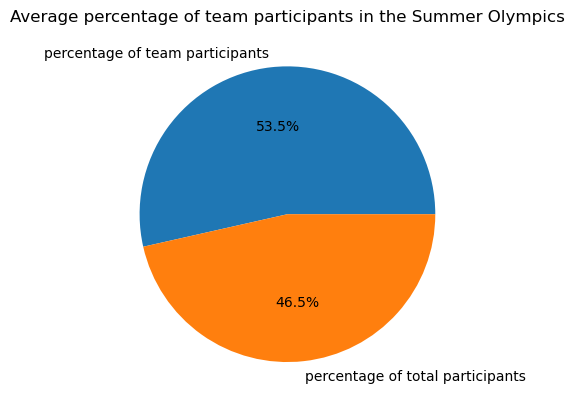

In [59]:
#let's see the number of participants in team sports in the summer olympics versus the total number of participants
teamparticipants=pd.DataFrame(teamsum.groupby(['year'])['athlete'].nunique())
teamparticipants=teamparticipants.rename(columns={'athlete':'total team participants'})
teamparticipants['total participants']=participantssummer['total athletes']
teamparticipants['percentage of team participants']=teamparticipants['total team participants']/teamparticipants['total participants']*100
teamparticipants['percentage of total participants']=100-teamparticipants['percentage of team participants']
#lets make a pie plot of the percentage of team participants in the summer olympics
teamparticipants=teamparticipants[['percentage of team participants','percentage of total participants']].mean()
teamparticipants.plot.pie(autopct='%1.1f%%', title='Average percentage of team participants in the Summer Olympics')



Text(0.5, 1.0, 'How the Number of Teamsports Affects the Number of Participants for the Summer Olympics')

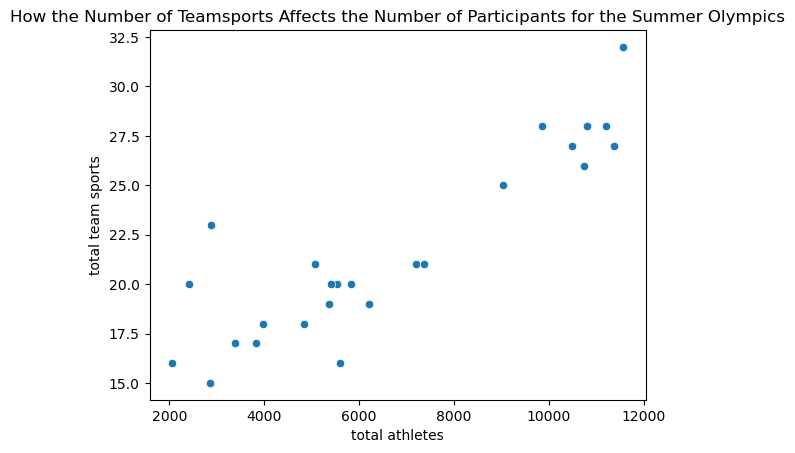

In [49]:
#let's look at the correlation between the number of participants and the number of team sports
# in the summer olympics
corr=pd.merge(participantssummer, teamsports, on='year')
corr=corr.rename(columns={'total athletes':'total athletes', 'sport':'total team sports'})
corrplot=sns.scatterplot(data=corr, x='total athletes', y='total team sports')
corrplot.set_title('How the Number of Teamsports Affects the Number of Participants for the Summer Olympics')


In [50]:
corr.corr()

,total athletes,total team sports
total athletes,1.000000,0.892502
total team sports,0.892502,1.000000


21:30:59 - cmdstanpy - INFO - Chain [1] start processing
21:30:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\tristan\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\tristan\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


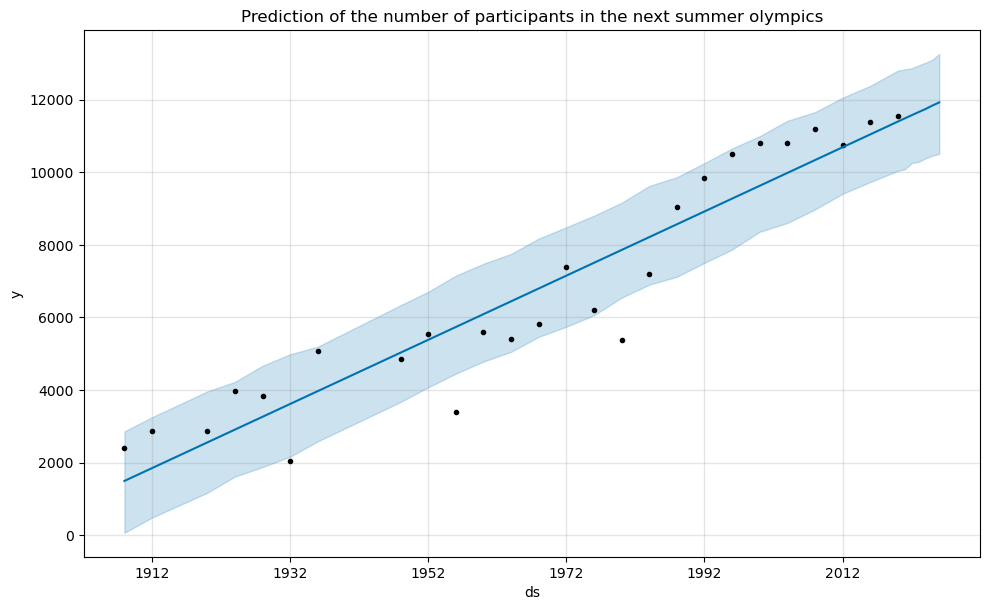

In [51]:
#let's try a prophet model to predict the number of participants in the next summer olympics
from prophet import Prophet
model=Prophet()
participantsummer=participantssummer.reset_index()
participantsummer=participantsummer.rename(columns={'year':'ds', 'total athletes':'y'})
model.fit(participantsummer)
future=model.make_future_dataframe(periods=6, freq='Y')
forecast=model.predict(future)
fig=model.plot(forecast)
plt.title('Prediction of the number of participants in the next summer olympics')
plt.show()



In [52]:
#lets look at the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1908-01-01,1495.388587,67.725500,2860.487136
1,1912-01-01,1848.794279,486.691968,3250.380131
2,1920-01-01,2555.605663,1169.458892,3961.199168
3,1924-01-01,2909.011355,1614.445124,4223.318446
4,1928-01-01,3262.417047,1876.721521,4667.126990
5,1932-01-01,3615.822739,2165.620433,4984.868384
6,1936-01-01,3969.228431,2585.814474,5193.378277
7,1948-01-01,5029.445509,3671.138954,6336.835886
8,1952-01-01,5382.851203,4075.512016,6705.999623
9,1956-01-01,5736.256898,4451.793992,7150.203571


<Axes: title={'center': 'Number of sports in Winter Olympics'}, xlabel='year'>

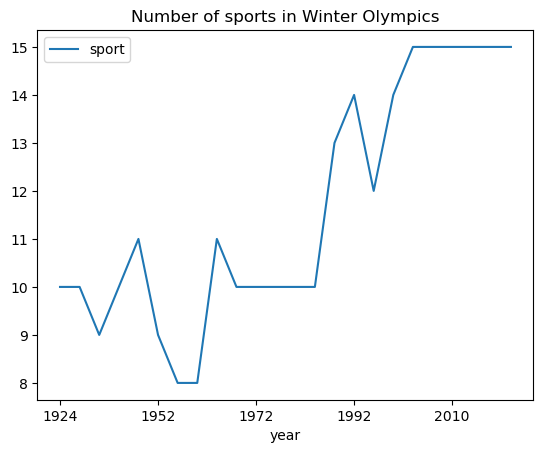

In [53]:
#let's see the number of sports in each winter olympics edition
wintersports=pd.DataFrame(Winter.groupby(['year'])['sport'].nunique())
wintersports.plot(title='Number of sports in Winter Olympics', kind='line')

<Axes: title={'center': 'Number of sports in each Summer Olympics edition'}, xlabel='year'>

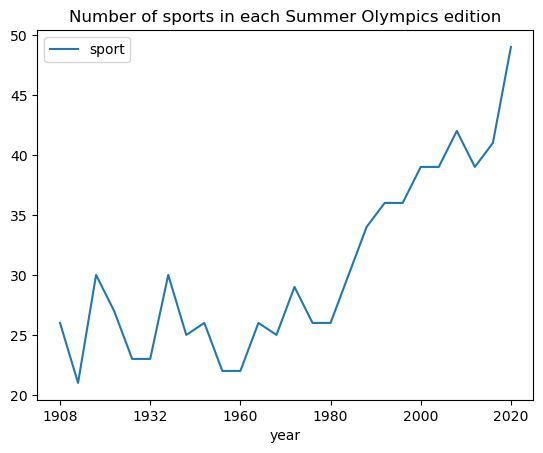

In [54]:
#plotting the data for summer olympics sports
summersports=pd.DataFrame(Summer.groupby(['year'])['sport'].nunique())
summersports.plot(title='Number of sports in each Summer Olympics edition')

In [55]:
Summer

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False,1908
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False,1908
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False,1908
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False,1908
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False,1908
...,...,...,...,...,...,...,...,...,...,...,...,...
316416,2020 Summer Olympics,61,USA,Wrestling,"Featherweight, Freestyle, Women",19009677,Jacarra Winchester,147307,=5,NaN,False,2020
316417,2020 Summer Olympics,61,USA,Wrestling,"Lightweight, Freestyle, Women",19009706,Helen Maroulis,132194,=3,Bronze,False,2020
316418,2020 Summer Olympics,61,USA,Wrestling,"Middleweight, Freestyle, Women",19009735,Kayla Miracle,147308,12,NaN,False,2020
316419,2020 Summer Olympics,61,USA,Wrestling,"Light-Heavyweight, Freestyle, Women",19009764,Tamyra Mensah-Stock,147310,1,Gold,False,2020
